In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

def plot(plot_df):
    # Font and layout
    plt.rcParams.update({
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"],
        "axes.titlesize": 18,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": 11,
        "legend.title_fontsize": 12
    })

    # Visual style colors
    background_color = "#f0e8dd"
    grid_color = "#cccccc"

    fig, ax = plt.subplots(figsize=(10, 6), facecolor=background_color)
    ax.set_facecolor(background_color)

    color_map = {
        'muMLP': '#a63603',   # muted burnt orange
        'SPMLP': '#3182bd',   # muted steel blue
    }

    # Normalize sizes for brightness adjustment
    sub_keys = sorted(set(col[2] for col in plot_df.columns))
    subkey_ints = {k: int(''.join(filter(str.isdigit, k))) for k in sub_keys}
    norm = mcolors.Normalize(vmin=min(subkey_ints.values()), vmax=max(subkey_ints.values()))

    for col in plot_df.columns:
        model_name, opt_str, size_str = col
        base_color = color_map[model_name]
        width = subkey_ints[size_str]

        # Apply wider brightness gradient: 0.65 to 1.0
        rgb = mcolors.to_rgb(base_color)
        hsv = mcolors.rgb_to_hsv(rgb)
        hsv[2] = norm(width) * 0.35 + 0.65  # V in HSV ∈ [0.65, 1.0]
        bright_color = mcolors.hsv_to_rgb(hsv)

        label = f"{model_name} {size_str}"
        plot_df[col].plot(ax=ax, label=label, color=bright_color, linewidth=2.2)

    ax.set_title(f"muP vs SP ({opt_str} optimizer)\nTraining Loss vs Learning Rate (CIFAR-10, MLP)", weight='bold', pad=15)
    ax.set_xlabel("log₂(Learning Rate)")
    ax.set_ylabel("Training Loss (log scale)")
    ax.set_yscale('log')

    # Full elegant grid
    ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.6, color=grid_color, alpha=0.7)

    ax.legend(title="Model Variant", loc='best', frameon=False)

    plt.tight_layout()
    plt.show()





def list_files(ext=".csv"):
    files = os.listdir('.')
    print("Files in the current directory:")
    for file in files:
        if file.endswith(ext):
            print(file)

def load_dfs(files):
    dfs = []
    keys = []
    for file in files:
        if file.endswith('.csv'):
            df = pd.read_csv(file, index_col=0)
            model_name = file.split('_')[-3]
            dataset_name = file.split('_')[-2]
            optimizer_name = file.split('_')[-1].split('.')[0]
            dfs.append(df)
            keys.append((model_name, dataset_name, optimizer_name))
    return pd.concat(dfs, axis=1, keys=keys)

dfs = load_dfs(os.listdir('.'))

In [129]:
dfs.head()

muMLP                                                    \
                 1.0                                                     
                Adam                                                     
                 128       256       512      1024      2048      4096   
-12.000000  0.837259  0.443889  0.178623  0.112417  0.114056  0.129272   
-11.692308  0.785320  0.392334  0.158018  0.113147  0.128210  0.148703   
-11.384615  0.746845  0.352108  0.163893  0.141645  0.165518  0.193154   
-11.076923  0.711974  0.340421  0.179619  0.182682  0.183797  0.251045   
-10.769231  0.694418  0.334041  0.211815  0.207424  0.255888  0.331132   

                                                    ...     SPMLP            \
                                                    ...       1.0             
                           SGD                      ...       SGD             
                8192       128       256       512  ...      2048      4096   
-12.000000  0.164933  1.858027  1.795573  1.754231  ...  0.868916  0.298806   
-11.692308  0.200671  1.827873  1.764151  1.722435  ...  0.775988  0.236716   
-11.384615  0.267014  1.798149  1.732625  1.690285  ...  0.681622  0.188252   
-11.076923  0.336920  1.768266  1.700536  1.657593  ...  0.588212  0.150567   
-10.769231  0.436939  1.738079  1.668017  1.624210  ...  0.499298  0.118917   

                                                                        \
                                                                         
                          Adam                                           
                8192       128       256       512      1024      2048   
-12.000000  0.074848  1.240068  0.709156  0.142702  0.100723  0.103995   
-11.692308  0.061903  1.187817  0.626388  0.141934  0.109072  0.125203   
-11.384615  0.051990  1.139945  0.560597  0.138823  0.114019  0.125809   
-11.076923  0.043544  1.089579  0.520011  0.168217  0.131821  0.169446   
-10.769231  0.036066  1.044194  0.499076  0.186610  0.181871  0.227061   

                                
                                
                                
                4096      8192  
-12.000000  0.116936  0.206688  
-11.692308  0.142220  0.215037  
-11.384615  0.193951  0.281528  
-11.076923  0.261928  0.344231  
-10.769231  0.330376  0.383861  

[5 rows x 28 columns]

In [130]:
# SGD
plot_df = dfs.loc[:, (slice(None), "1.0", "SGD", slice(None))]
plot_df.columns = plot_df.columns.droplevel(1)
plot_df.head()

muMLP                                                    \
                 SGD                                                     
                 128       256       512      1024      2048      4096   
-12.000000  1.858027  1.795573  1.754231  1.716022  1.704689  1.695603   
-11.692308  1.827873  1.764151  1.722435  1.683312  1.670235  1.661184   
-11.384615  1.798149  1.732625  1.690285  1.650340  1.635353  1.626421   
-11.076923  1.768266  1.700536  1.657593  1.616803  1.599884  1.591048   
-10.769231  1.738079  1.668017  1.624210  1.582475  1.563653  1.554703   

                         SPMLP                                          \
                           SGD                                           
                8192       128       256       512      1024      2048   
-12.000000  1.691914  1.844064  1.711327  1.567660  1.328280  0.868916   
-11.692308  1.657666  1.828621  1.692987  1.538848  1.274379  0.775988   
-11.384615  1.622863  1.815196  1.675789  1.508851  1.216574  0.681622   
-11.076923  1.587284  1.801808  1.658032  1.478291  1.155058  0.588212   
-10.769231  1.550635  1.788157  1.638961  1.444673  1.086026  0.499298   

                                
                                
                4096      8192  
-12.000000  0.298806  0.074848  
-11.692308  0.236716  0.061903  
-11.384615  0.188252  0.051990  
-11.076923  0.150567  0.043544  
-10.769231  0.118917  0.036066

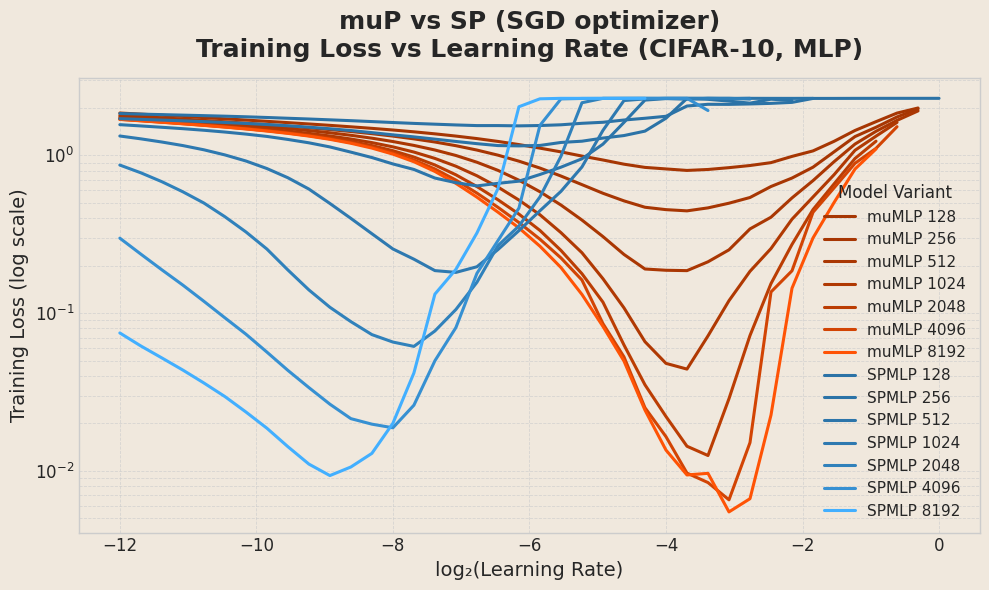

In [131]:
plot(plot_df)

In [132]:
# Adam
plot_df = dfs.loc[:, (slice(None), "1.0", "Adam", slice(None))]
plot_df.columns = plot_df.columns.droplevel(1)
plot_df.head()

muMLP                                                    \
                Adam                                                     
                 128       256       512      1024      2048      4096   
-12.000000  0.837259  0.443889  0.178623  0.112417  0.114056  0.129272   
-11.692308  0.785320  0.392334  0.158018  0.113147  0.128210  0.148703   
-11.384615  0.746845  0.352108  0.163893  0.141645  0.165518  0.193154   
-11.076923  0.711974  0.340421  0.179619  0.182682  0.183797  0.251045   
-10.769231  0.694418  0.334041  0.211815  0.207424  0.255888  0.331132   

                         SPMLP                                          \
                          Adam                                           
                8192       128       256       512      1024      2048   
-12.000000  0.164933  1.240068  0.709156  0.142702  0.100723  0.103995   
-11.692308  0.200671  1.187817  0.626388  0.141934  0.109072  0.125203   
-11.384615  0.267014  1.139945  0.560597  0.138823  0.114019  0.125809   
-11.076923  0.336920  1.089579  0.520011  0.168217  0.131821  0.169446   
-10.769231  0.436939  1.044194  0.499076  0.186610  0.181871  0.227061   

                                
                                
                4096      8192  
-12.000000  0.116936  0.206688  
-11.692308  0.142220  0.215037  
-11.384615  0.193951  0.281528  
-11.076923  0.261928  0.344231  
-10.769231  0.330376  0.383861

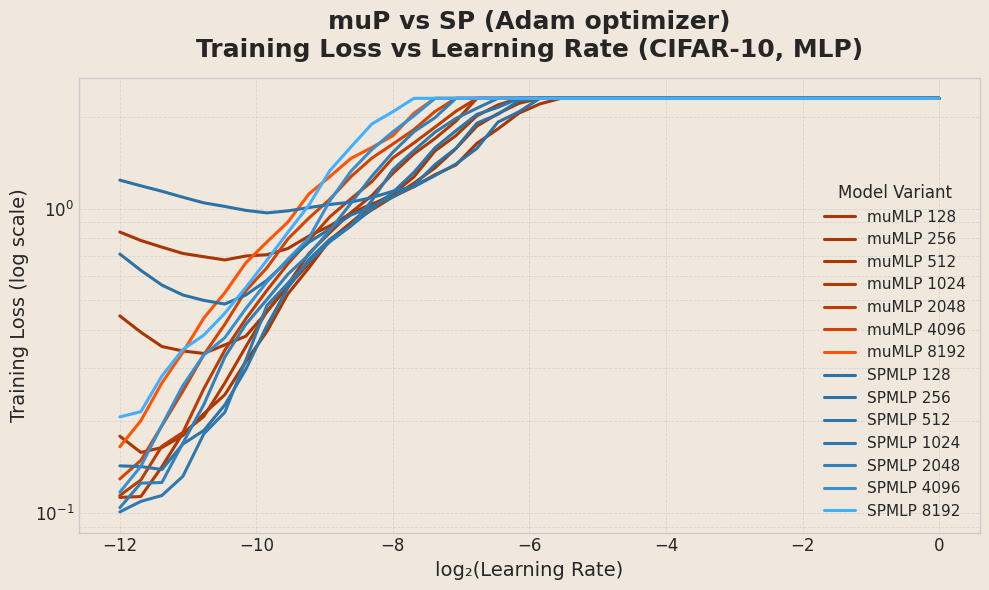

In [133]:
plot(plot_df)